# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Question -1

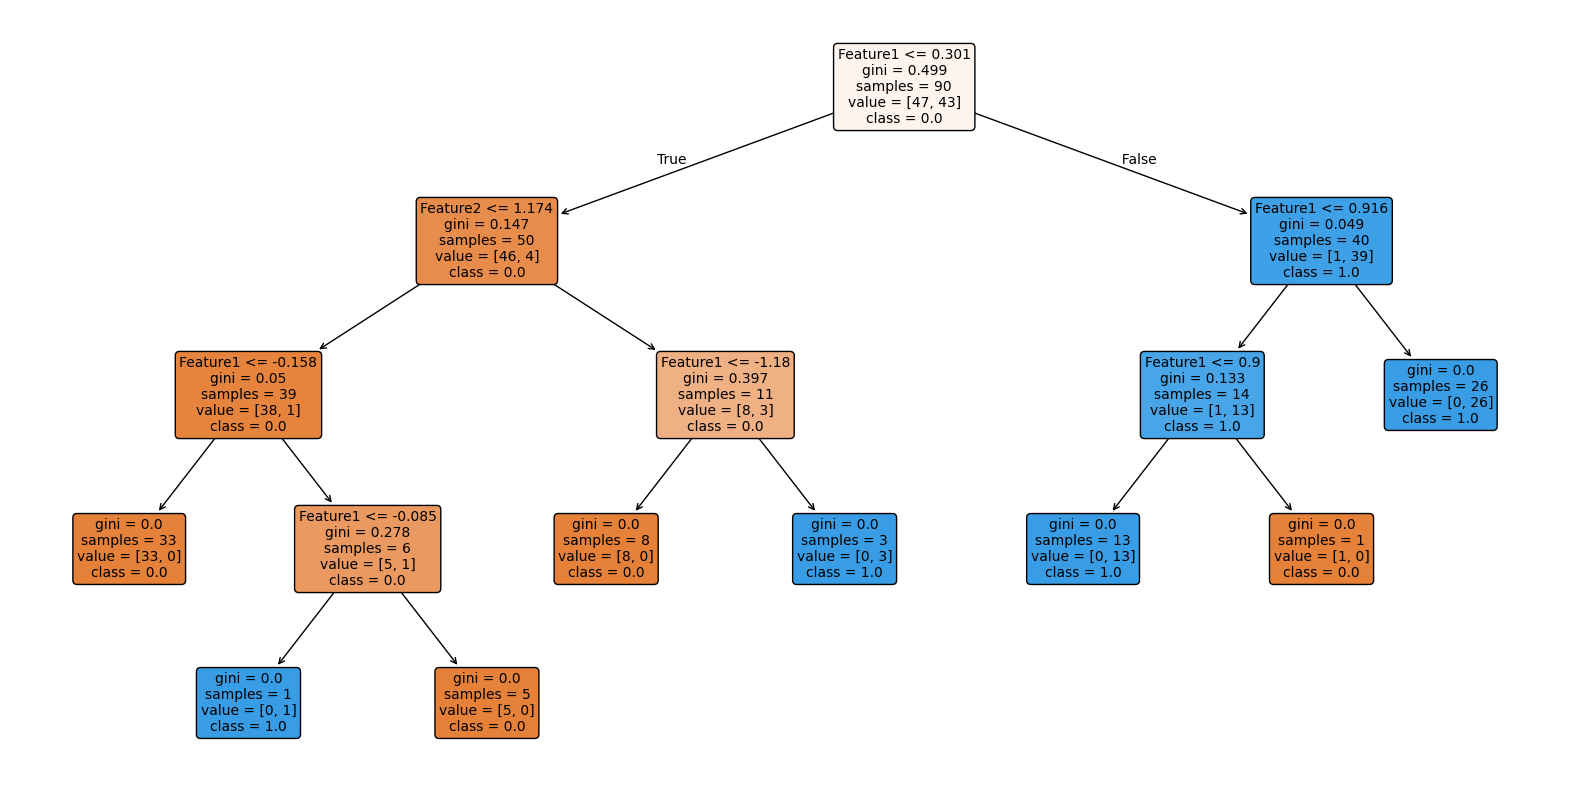

In [2]:
#Read Data
df = pd.read_csv('/content/A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv')

# Split into features X and target y
X = df.iloc[:, :-1]
y = df.iloc[:,  -1]

# Train a full (unpruned) Decision Tree classifier

clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=None,
                             random_state=0)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=[str(c) for c in clf.classes_],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


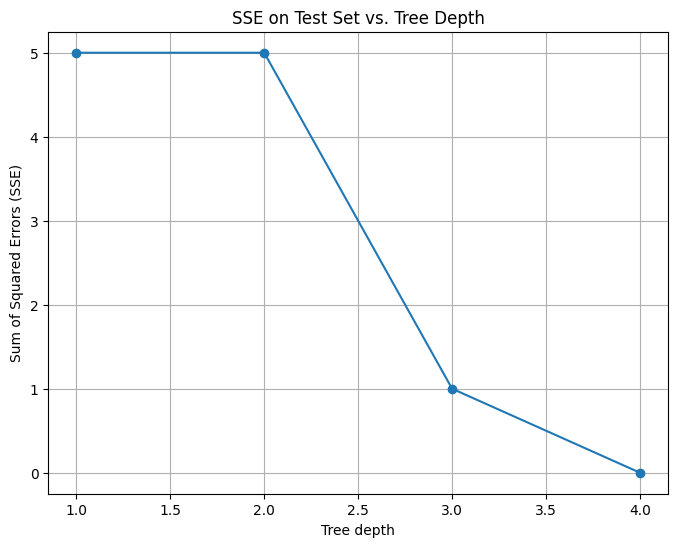

In [3]:
# Determine the maximum depth of a fully grown tree
full_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
full_tree.fit(X, y)
max_depth = full_tree.get_depth()

# For each depth from 1 to max_depth, train & compute SSE
depths = list(range(1, max_depth + 1))
sses = []

for d in depths:
    clf_d = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=42)
    clf_d.fit(X, y)
    y_pred = clf_d.predict(X)
    sse = np.sum((y - y_pred) ** 2)
    sses.append(sse)

# Plot SSE vs. depth
plt.figure(figsize=(8, 6))
plt.plot(depths, sses, marker='o')
plt.xlabel('Tree depth')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE on Test Set vs. Tree Depth')
plt.grid(True)
plt.show()


In [4]:
#Compute the change in SSE when going from depth d to d+1
delta_sse = np.diff(sses)

# Look at absolute changes to find the smallest reduction
abs_delta = np.abs(delta_sse)

# Find the index where this change is minimal
opt_idx = np.argmin(abs_delta)

# Choose the pruning depth
optimal_depth = depths[opt_idx]

print(f"Depths:          {depths}")
print(f"SSEs:            {sses}")
print(f"ΔSSE between:    {list(delta_sse)}")
print(f"Absolute ΔSSEs:  {list(abs_delta)}")
print(f"Optimal pruning depth = {optimal_depth}")


Depths:          [1, 2, 3, 4]
SSEs:            [np.float64(5.0), np.float64(5.0), np.float64(1.0), np.float64(0.0)]
ΔSSE between:    [np.float64(0.0), np.float64(-4.0), np.float64(-1.0)]
Absolute ΔSSEs:  [np.float64(0.0), np.float64(4.0), np.float64(1.0)]
Optimal pruning depth = 1


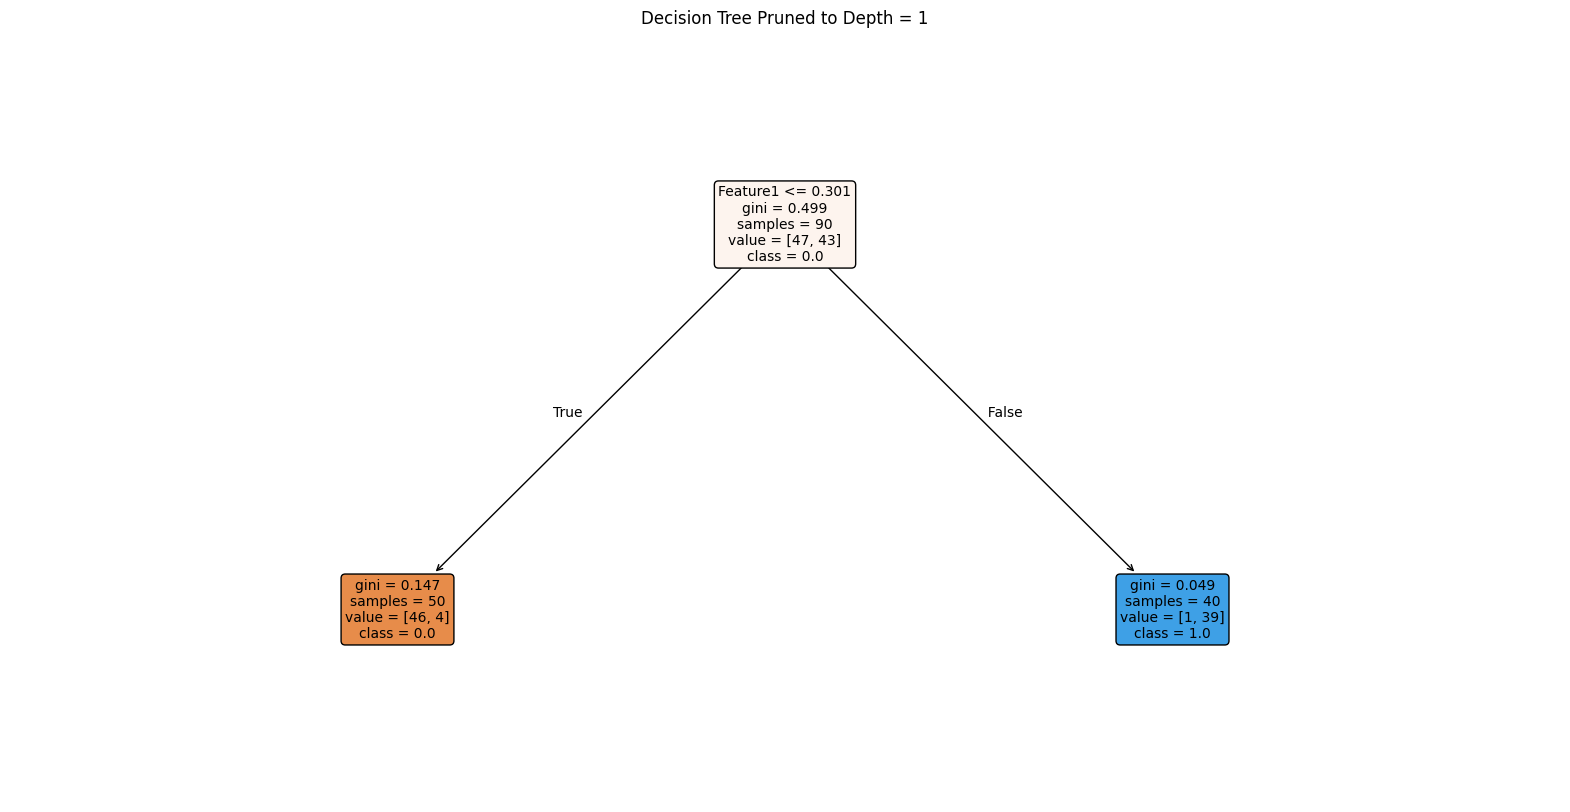

In [5]:
# Train the pruned tree
pruned_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=optimal_depth,   # from part (c)
    random_state=42
)
pruned_clf.fit(X, y)

# Visualize the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(
    pruned_clf,
    feature_names=X.columns,
    class_names=[str(c) for c in pruned_clf.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(f'Decision Tree Pruned to Depth = {optimal_depth}')
plt.show()

# Question 2

Test MSEs: {'Linear': 0.10802219762197378, 'Ridge': 0.10809827640275864, 'Lasso': 0.12057232448567515}


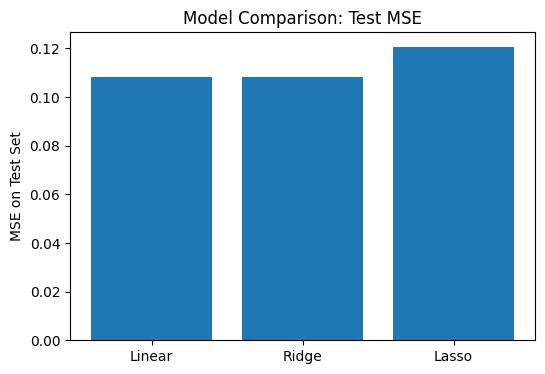

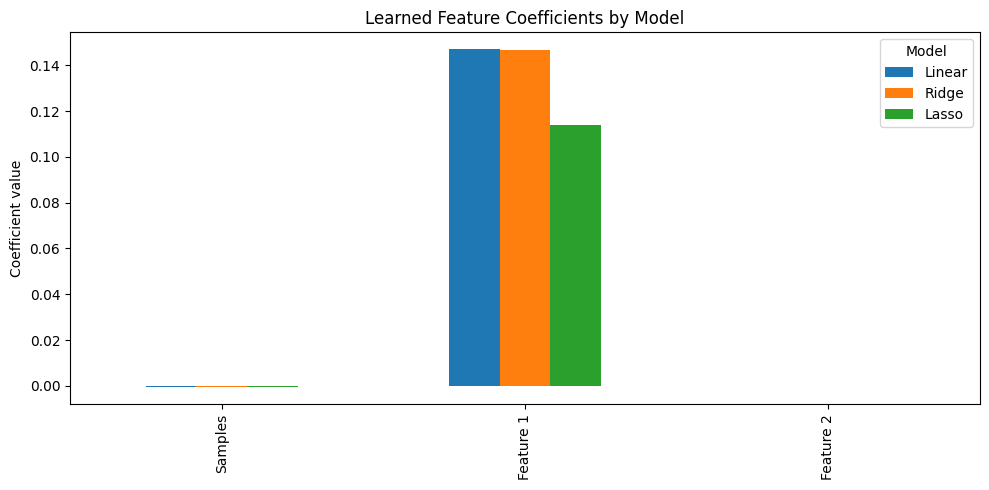

In [6]:
df = pd.read_csv('/content/A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv')

# Split into features and target
X = df.iloc[:, :-1]
y = df.iloc[:,  -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define and fit the three models
models = {
    'Linear': LinearRegression(),
    'Ridge':   Ridge(alpha=1.0, random_state=42),
    'Lasso':   Lasso(alpha=0.1, random_state=42)
}

for name, mdl in models.items():
    mdl.fit(X_train, y_train)

# Compute MSE on the test set
mses = { name: mean_squared_error(y_test, mdl.predict(X_test))
         for name, mdl in models.items() }

print("Test MSEs:", mses)

# Plot bar chart of MSEs
plt.figure(figsize=(6,4))
plt.bar(mses.keys(), mses.values())
plt.ylabel('MSE on Test Set')
plt.title('Model Comparison: Test MSE')
plt.show()

# Extract and plot coefficients
coef_df = pd.DataFrame(
    { name: mdl.coef_ for name, mdl in models.items() },
    index=X.columns
)

# grouped‐bar chart
coef_df.plot(kind='bar', figsize=(10,5))
plt.ylabel('Coefficient value')
plt.title('Learned Feature Coefficients by Model')
plt.legend(title='Model')
plt.tight_layout()
plt.show()